In [1]:
import datetime
import pandas as pd

# !pip install pm4py

# Tratamento de diretório

In [3]:
import os.path
def path_base(base_name):
    current_dir = os.path.abspath(os.path.join(os.getcwd()))
    print(current_dir)
    data_dir = current_dir.replace('notebook','data')
    print(data_dir)
    data_base = data_dir + '\\' + base_name
    print(data_base)
    return data_base

# Importar Bibliotecas

In [4]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.evaluation.replay_fitness import evaluator as replay_fitness
from pm4py.evaluation.generalization import evaluator as calc_generaliz
from pm4py.evaluation.precision import evaluator as calc_precision
from pm4py.evaluation.simplicity import evaluator as calc_simplic
from pm4py.algo.conformance.alignments import algorithm as alignments
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.exporter.xes import exporter as xes_exporter
from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.evaluation.soundness.woflan import algorithm as woflan

# calculate_quality_metrics_sound

In [5]:
def calculate_quality_metrics_sound(petrinet, start, log, log_name, algo, parameters):
    gviz = pn_visualizer.apply(*petrinet)
    gviz.render(path_base(log_name + '-' + algo + '.png'))
    pn_visualizer.view(gviz)
    alignments_res = alignments.apply_log(log, *petrinet, parameters=parameters)
    fitness = replay_fitness.evaluate(alignments_res, variant=replay_fitness.Variants.ALIGNMENT_BASED)
    precision = calc_precision.apply(log, *petrinet, parameters=parameters, variant=calc_precision.Variants.ALIGN_ETCONFORMANCE)
    generaliz = calc_generaliz.apply(log, *petrinet, parameters=parameters)
    simplic = calc_simplic.apply(petrinet[0])
    f_score = 2 * ((fitness['averageFitness'] * precision) / (fitness['averageFitness'] + precision))
    print(log_name + ' ' + algo + ' F:', '%.10f' % fitness['averageFitness'], ' P:', '%.10f' % precision, ' FS:', '%.10f' % f_score, ' G:', '%.10f' % generaliz, ' S:', '%.10f' % simplic, ' DURATION:', datetime.datetime.now() - start)


# calculate_quality_metrics_unsound

In [6]:
def calculate_quality_metrics_unsound(petrinet, start, log, log_name, algo, parameters):
    gviz = pn_visualizer.apply(*petrinet)
    gviz.render(path_base(log_name + '-' + algo + '.png'))
    pn_visualizer.view(gviz)
    fitness = replay_fitness.apply(log, *petrinet, variant=replay_fitness.Variants.TOKEN_BASED)
    precision = calc_precision.apply(log, *petrinet, parameters=parameters, variant=calc_precision.Variants.ETCONFORMANCE_TOKEN)
    generaliz = calc_generaliz.apply(log, *petrinet, parameters=parameters, variant=calc_generaliz.Variants.GENERALIZATION_TOKEN)
    simplic = calc_simplic.apply(petrinet[0])
    f_score = 2 * ((fitness['log_fitness'] * precision) / (fitness['log_fitness'] + precision))
    print(log_name + ' ' + algo + ' F:', '%.10f' % fitness['log_fitness'], ' P:', '%.10f' % precision, ' FS:', '%.10f' % f_score, ' G:', '%.10f' % generaliz, ' S:', '%.10f' % simplic, ' DURATION:', datetime.datetime.now() - start)


# Inductive Miner

In [7]:
# Inductive Miner IM case id
def discover_process_models_im(log_path, log_name):
    start = datetime.datetime.now()
    log = xes_importer.apply(log_path)


    parameters = {inductive_miner.Variants.IM.value.Parameters.CASE_ID_KEY: 'case_id', inductive_miner.Variants.IM.value.Parameters.TIMESTAMP_KEY: 'sys_updated_at', woflan.Parameters.RETURN_ASAP_WHEN_NOT_SOUND: True, woflan.Parameters.PRINT_DIAGNOSTICS: False, woflan.Parameters.RETURN_DIAGNOSTICS: False}
    variant = inductive_miner.Variants.IM
    petrinet = inductive_miner.apply(log, parameters=parameters, variant=variant)
    is_sound = woflan.apply(*petrinet, parameters=parameters)
    if is_sound == True:
        calculate_quality_metrics_sound(petrinet, start, log, log_name,   'IM_sound', parameters)
    else:
        calculate_quality_metrics_unsound(petrinet, start, log, log_name, 'IM_unsound', parameters)




In [8]:
# Inductive Miner IM case imf 02
def discover_process_models_imf_02(log_path, log_name):
    start = datetime.datetime.now()
    log = xes_importer.apply(log_path)

    parameters = {inductive_miner.Variants.IMf.value.Parameters.NOISE_THRESHOLD: 0.2, inductive_miner.Variants.IMf.value.Parameters.CASE_ID_KEY: 'case_id', inductive_miner.Variants.IMf.value.Parameters.TIMESTAMP_KEY: 'sys_updated_at', woflan.Parameters.RETURN_ASAP_WHEN_NOT_SOUND: True, woflan.Parameters.PRINT_DIAGNOSTICS: False, woflan.Parameters.RETURN_DIAGNOSTICS: False}
    variant = inductive_miner.Variants.IMf
    petrinet = inductive_miner.apply(log, parameters=parameters, variant=variant)
    is_sound = woflan.apply(*petrinet, parameters=parameters)
    if is_sound == True:
        calculate_quality_metrics_sound(petrinet, start, log, log_name,   'IMf-0.2_sound', parameters)
    else:
        calculate_quality_metrics_unsound(petrinet, start, log, log_name, 'IMf-0.2_unsound', parameters)


In [9]:
# Inductive Miner IM case imf 05
def discover_process_models_imf_05(log_path, log_name):
    start = datetime.datetime.now()
    log = xes_importer.apply(log_path)

    parameters = {inductive_miner.Variants.IMf.value.Parameters.NOISE_THRESHOLD: 0.5, inductive_miner.Variants.IMf.value.Parameters.CASE_ID_KEY: 'case_id', inductive_miner.Variants.IMf.value.Parameters.TIMESTAMP_KEY: 'sys_updated_at', woflan.Parameters.RETURN_ASAP_WHEN_NOT_SOUND: True, woflan.Parameters.PRINT_DIAGNOSTICS: False, woflan.Parameters.RETURN_DIAGNOSTICS: False}
    variant = inductive_miner.Variants.IMf
    petrinet = inductive_miner.apply(log, parameters=parameters, variant=variant)
    is_sound = woflan.apply(*petrinet, parameters=parameters)
    if is_sound == True:
        calculate_quality_metrics_sound(petrinet, start, log, log_name,   'IMf-0.5_sound', parameters)
    else:
        calculate_quality_metrics_unsound(petrinet, start, log, log_name, 'IMf-0.5_unsound', parameters)


In [10]:
# Inductive Miner IM case imf 08
def discover_process_models_imf_08(log_path, log_name):
    start = datetime.datetime.now()
    log = xes_importer.apply(log_path)

    parameters = {inductive_miner.Variants.IMf.value.Parameters.NOISE_THRESHOLD: 0.8, inductive_miner.Variants.IMf.value.Parameters.CASE_ID_KEY: 'case_id', inductive_miner.Variants.IMf.value.Parameters.TIMESTAMP_KEY: 'sys_updated_at', woflan.Parameters.RETURN_ASAP_WHEN_NOT_SOUND: True, woflan.Parameters.PRINT_DIAGNOSTICS: False, woflan.Parameters.RETURN_DIAGNOSTICS: False}
    variant = inductive_miner.Variants.IMf
    petrinet = inductive_miner.apply(log, parameters=parameters, variant=variant)
    is_sound = woflan.apply(*petrinet, parameters=parameters)
    if is_sound == True:
        calculate_quality_metrics_sound(petrinet, start, log, log_name,   'IMf-0.8_sound', parameters)
    else:
        calculate_quality_metrics_unsound(petrinet, start, log, log_name, 'IMf-0.8_unsound', parameters)


In [11]:
# Inductive Miner IMd case id
def discover_process_models_imd(log_path, log_name):
    start = datetime.datetime.now()
    log = xes_importer.apply(log_path)

    parameters = {inductive_miner.Variants.IMd.value.Parameters.CASE_ID_KEY: 'case_id', inductive_miner.Variants.IMd.value.Parameters.TIMESTAMP_KEY: 'sys_updated_at', woflan.Parameters.RETURN_ASAP_WHEN_NOT_SOUND: True, woflan.Parameters.PRINT_DIAGNOSTICS: False, woflan.Parameters.RETURN_DIAGNOSTICS: False}
    variant = inductive_miner.Variants.IMd
    petrinet = inductive_miner.apply(log, parameters=parameters, variant=variant)
    is_sound = woflan.apply(*petrinet, parameters=parameters)
    if is_sound == True:
        calculate_quality_metrics_sound(petrinet, start, log, log_name,   'IMd _sound', parameters)
    else:
        calculate_quality_metrics_unsound(petrinet, start, log, log_name, 'IMd_unsound_', parameters)


# Alpha

In [12]:
# Alpha
def discover_process_models_am(log_path, log_name):
    start = datetime.datetime.now()
    log = xes_importer.apply(log_path)

    parameters = {woflan.Parameters.RETURN_ASAP_WHEN_NOT_SOUND: True, woflan.Parameters.PRINT_DIAGNOSTICS: False, woflan.Parameters.RETURN_DIAGNOSTICS: False}
    variant = alpha_miner.Variants.ALPHA_VERSION_CLASSIC
    petrinet = alpha_miner.apply(log, parameters=parameters, variant=variant)
    is_sound = woflan.apply(*petrinet, parameters=parameters)
    if is_sound == True:
        calculate_quality_metrics_sound(petrinet, start, log, log_name,   'alpha     (sound) ', parameters)
    else:
        calculate_quality_metrics_unsound(petrinet, start, log, log_name, 'alpha   (unsound) ', parameters)


    parameters = {woflan.Parameters.RETURN_ASAP_WHEN_NOT_SOUND: True, woflan.Parameters.PRINT_DIAGNOSTICS: False, woflan.Parameters.RETURN_DIAGNOSTICS: False}
    variant = alpha_miner.Variants.ALPHA_VERSION_PLUS
    petrinet = alpha_miner.apply(log, parameters=parameters, variant=variant)
    is_sound = woflan.apply(*petrinet, parameters=parameters)
    if is_sound == True:
        calculate_quality_metrics_sound(petrinet, start, log, log_name, 'alpha+    (sound) ', parameters)
    else:
        #print('    xes alpha+  (unsound)  Error')
        calculate_quality_metrics_unsound(petrinet, start, log, log_name, 'alpha+  (unsound) ', parameters)


# Heuristic

In [13]:
def discover_process_models_hm_1(log_path, log_name):
    start = datetime.datetime.now()
    log = xes_importer.apply(log_path)

    parameters = {heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 1, woflan.Parameters.RETURN_ASAP_WHEN_NOT_SOUND: True, woflan.Parameters.PRINT_DIAGNOSTICS: False, woflan.Parameters.RETURN_DIAGNOSTICS: False}
    petrinet = heuristics_miner.apply(log, parameters=parameters)
    is_sound = woflan.apply(*petrinet, parameters=parameters)
    if is_sound == True:
        calculate_quality_metrics_sound(petrinet, start, log, log_name,   'HM-1.00   (sound) ', parameters)
    else:
        calculate_quality_metrics_unsound(petrinet, start, log, log_name, 'HM-1.00 (unsound) ', parameters)


In [14]:
def discover_process_models_hm_099(log_path, log_name):
    start = datetime.datetime.now()
    log = xes_importer.apply(log_path)

    parameters = {heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99, woflan.Parameters.RETURN_ASAP_WHEN_NOT_SOUND: True, woflan.Parameters.PRINT_DIAGNOSTICS: False, woflan.Parameters.RETURN_DIAGNOSTICS: False}
    petrinet = heuristics_miner.apply(log, parameters=parameters)
    is_sound = woflan.apply(*petrinet, parameters=parameters)
    if is_sound == True:
        calculate_quality_metrics_sound(petrinet, start, log, log_name,   'HM-0.99   (sound) ', parameters)
    else:
        calculate_quality_metrics_unsound(petrinet, start, log, log_name, 'HM-0.99 (unsound) ', parameters)


In [15]:
def discover_process_models_hm_05(log_path, log_name):
    start = datetime.datetime.now()
    log = xes_importer.apply(log_path)

    parameters = {heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.5, woflan.Parameters.RETURN_ASAP_WHEN_NOT_SOUND: True, woflan.Parameters.PRINT_DIAGNOSTICS: False, woflan.Parameters.RETURN_DIAGNOSTICS: False}
    petrinet = heuristics_miner.apply(log, parameters=parameters)
    is_sound = woflan.apply(*petrinet, parameters=parameters)
    if is_sound == True:
        calculate_quality_metrics_sound(petrinet, start, log, log_name,   'HM-0.50   (sound) ', parameters)
    else:
        calculate_quality_metrics_unsound(petrinet, start, log, log_name, 'HM-0.50 (unsound) ', parameters)


In [16]:
def discover_process_models_hm_01(log_path, log_name):
    start = datetime.datetime.now()
    log = xes_importer.apply(log_path)

    parameters = {heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.1, woflan.Parameters.RETURN_ASAP_WHEN_NOT_SOUND: True, woflan.Parameters.PRINT_DIAGNOSTICS: False, woflan.Parameters.RETURN_DIAGNOSTICS: False}
    petrinet = heuristics_miner.apply(log, parameters=parameters)
    is_sound = woflan.apply(*petrinet, parameters=parameters)
    if is_sound == True:
        calculate_quality_metrics_sound(petrinet, start, log, log_name,   'HM-0.10   (sound) ', parameters)
    else:
        calculate_quality_metrics_unsound(petrinet, start, log, log_name, 'HM-0.10 (unsound) ', parameters)

# Executar Alpha

BPI2017-xes Alpha
C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI_2017_Random.xes



C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI2017 Alpha xes-alpha   (unsound) .png


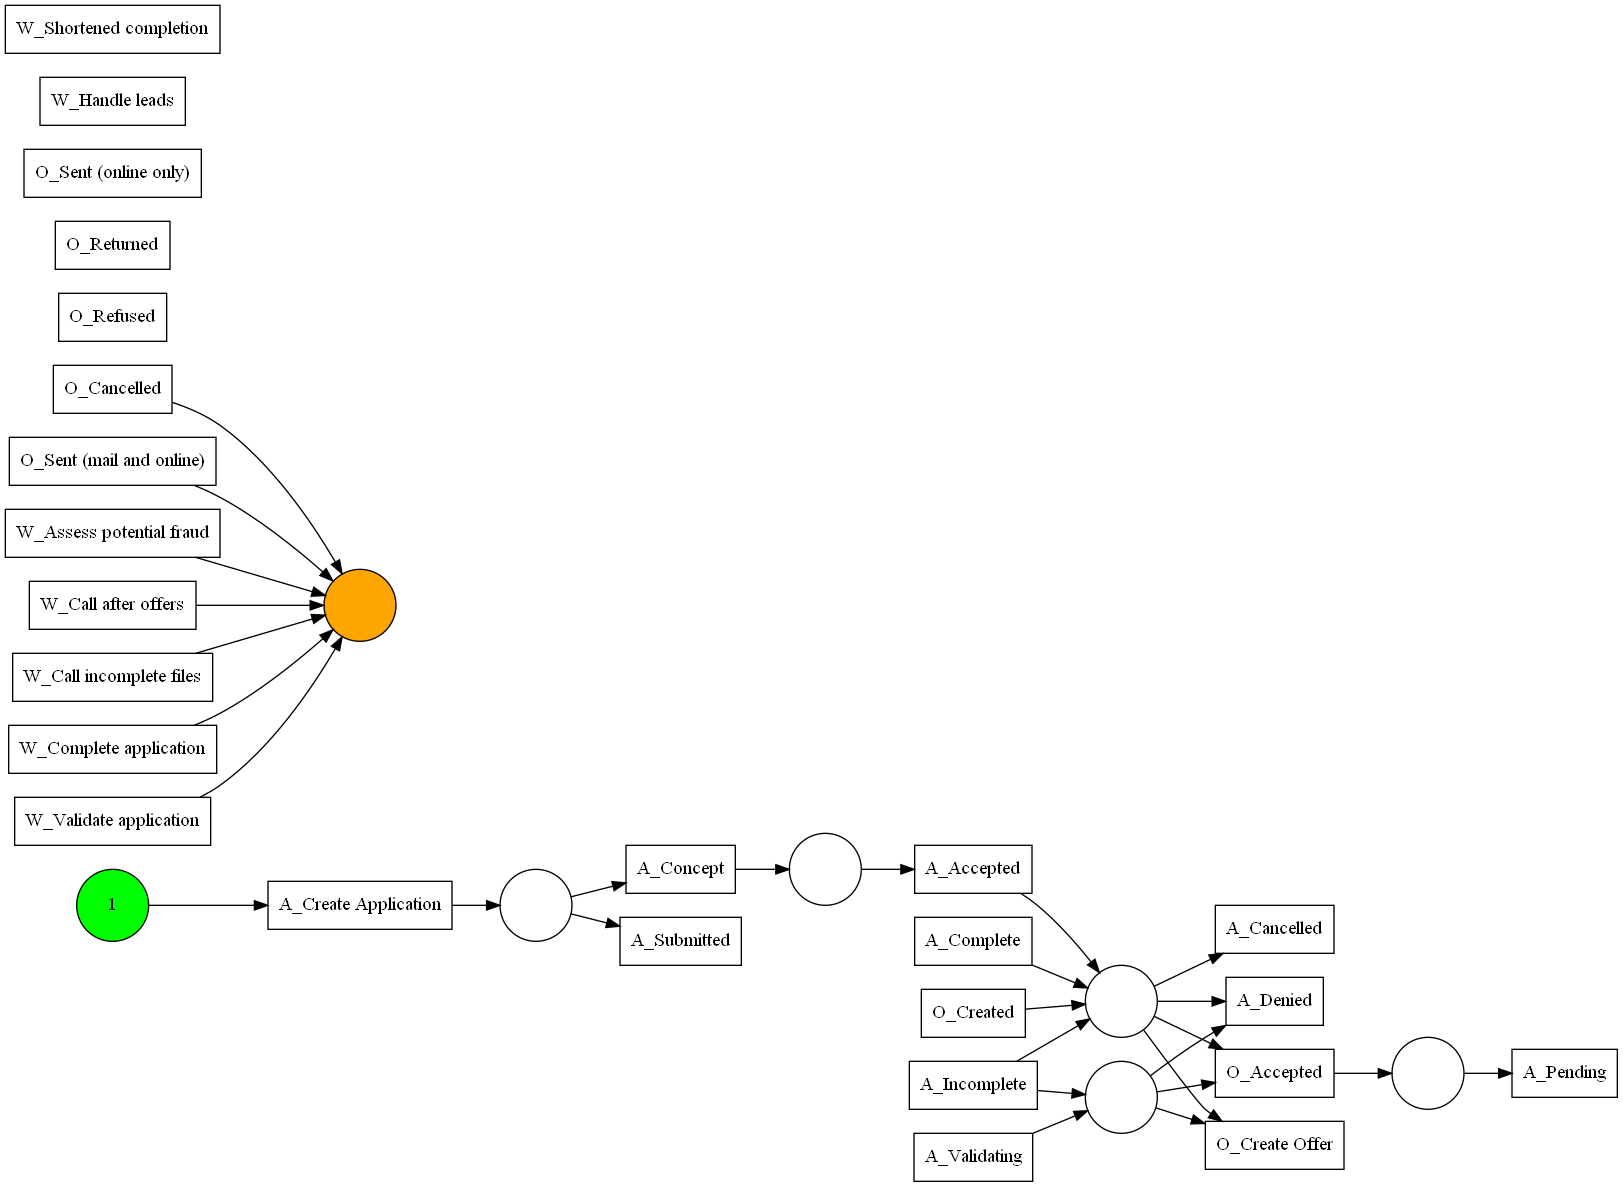

BPI2017 Alpha xes alpha   (unsound)  F: 0.5081760186  P: 0.0945543600  FS: 0.1594419658  G: 0.9749217056  S: 1.0000000000  DURATION: 0:01:15.098348
C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI2017 Alpha xes-alpha+  (unsound) .png


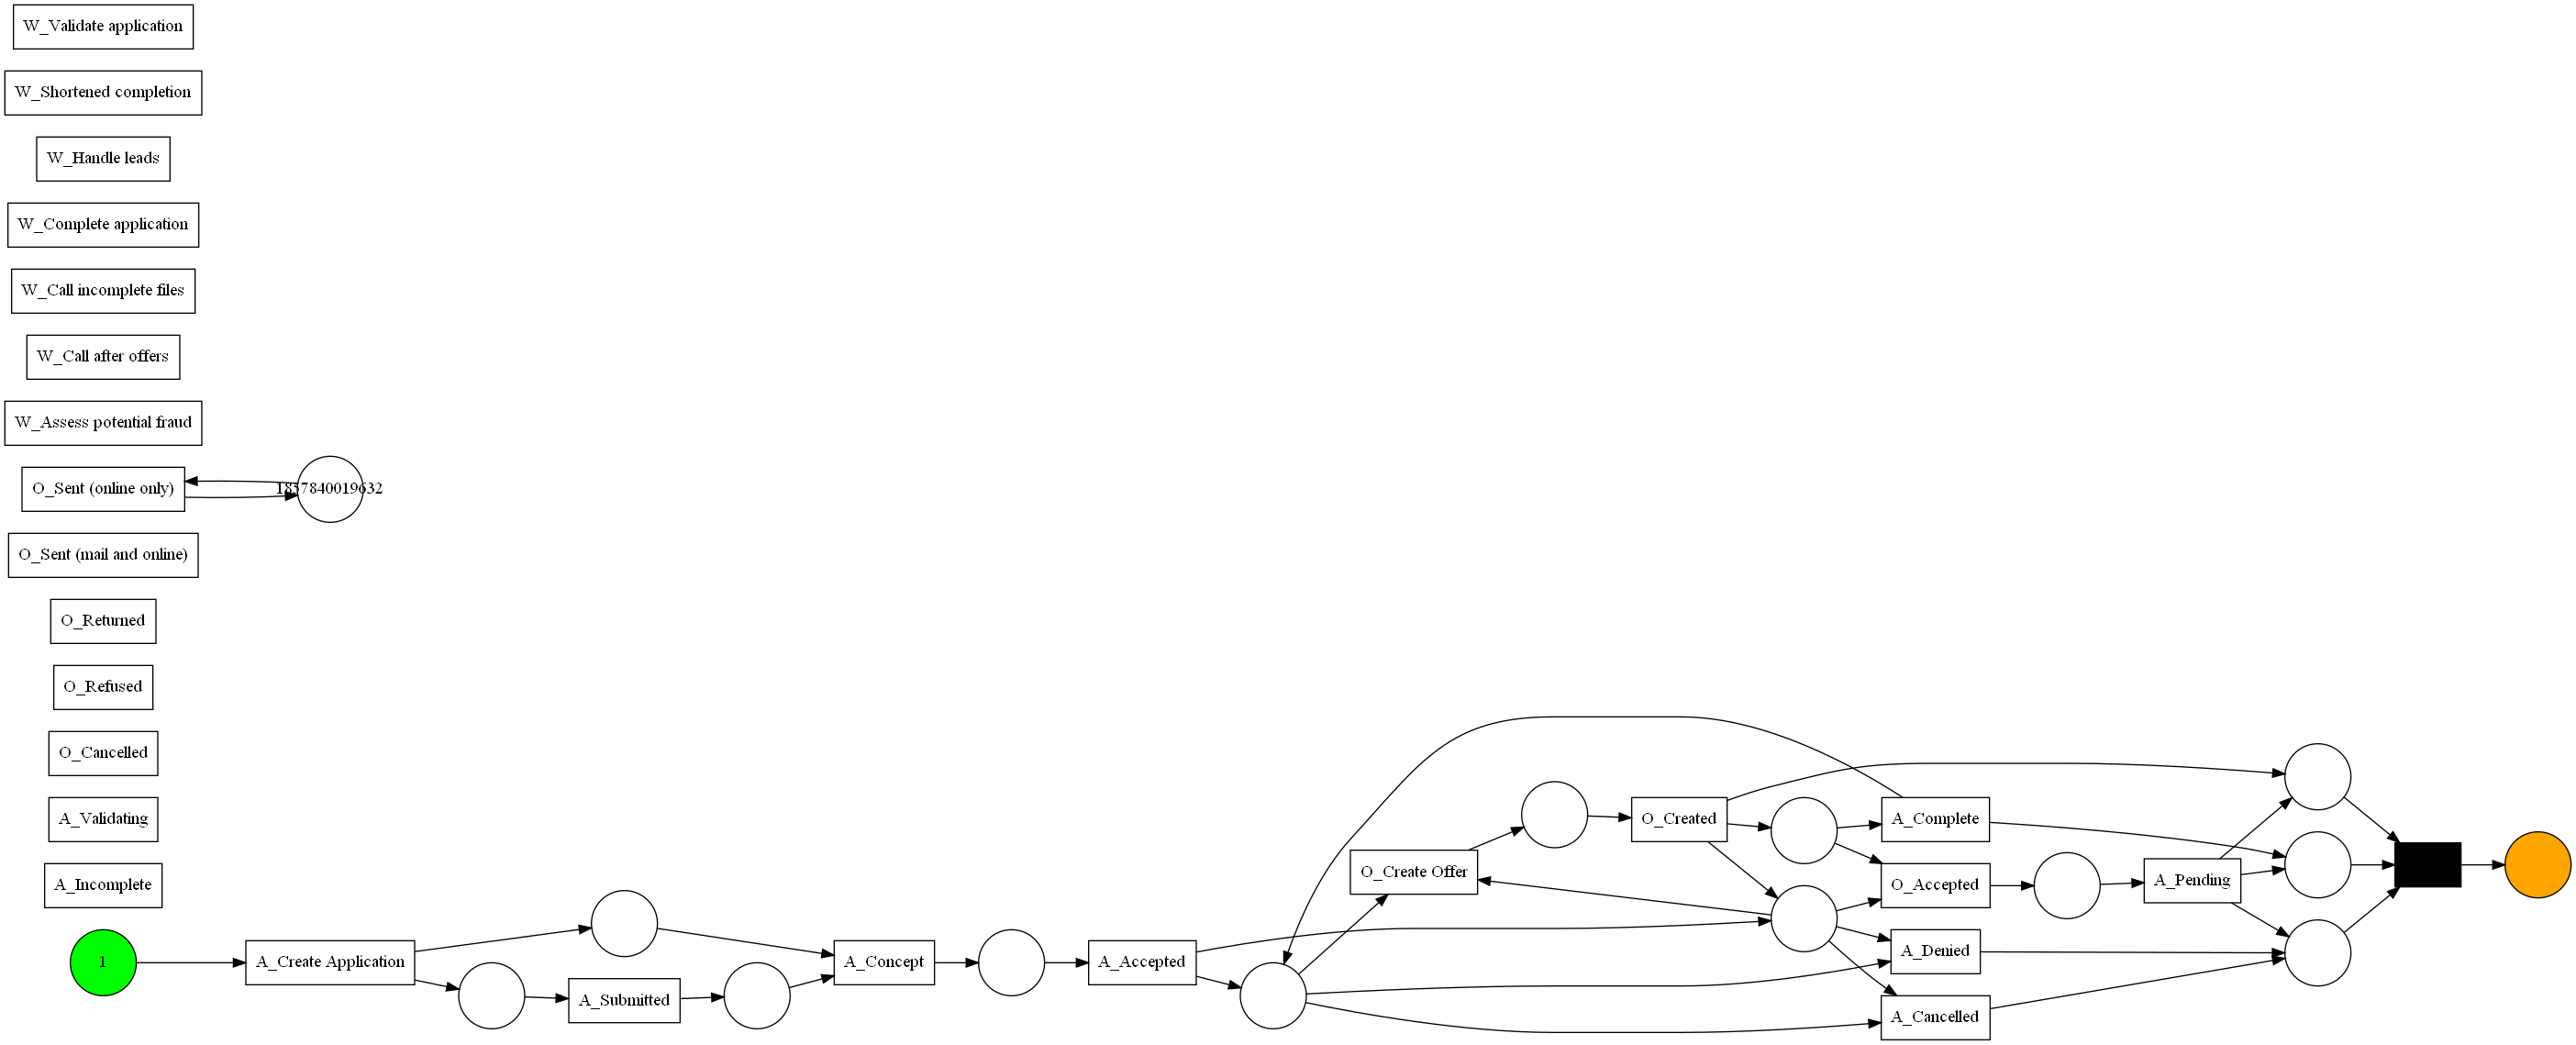

TypeError: unhashable type: 'dict'

In [18]:
#input: log in XES format
print('BPI2017-xes Alpha')
xes_log_path = path_base('BPI_2017_Random.xes') 
discover_process_models_am(xes_log_path, 'BPI2017 Alpha xes')

# Executar Heuristic

BPI2017-xes Heuristic 1
C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI_2017_Random.xes



C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI2017_HM_1_xes-HM-1.00 (unsound) .png


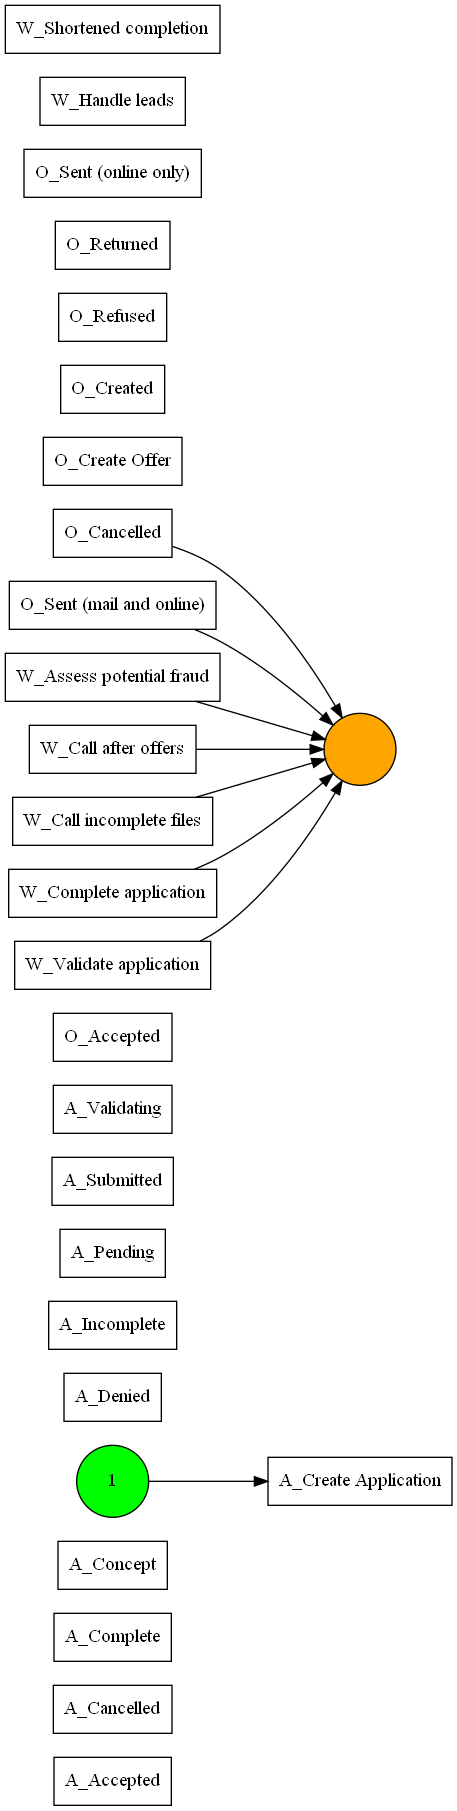

BPI2017_HM_1_xes HM-1.00 (unsound)  F: 0.5387092778  P: 0.0724297313  FS: 0.1276913032  G: 0.9749217056  S: 1.0000000000  DURATION: 0:02:54.211212


In [21]:
#input: log in XES format
print('BPI2017-xes Heuristic 1')
xes_log_path = path_base('BPI_2017_Random.xes') 
discover_process_models_hm_1(xes_log_path, 'BPI2017_HM_1_xes')

BPI2017-xes Heuristic 099
C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI_2017_Random.xes



C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI2017_HM_099_xes-HM-0.99 (unsound) .png


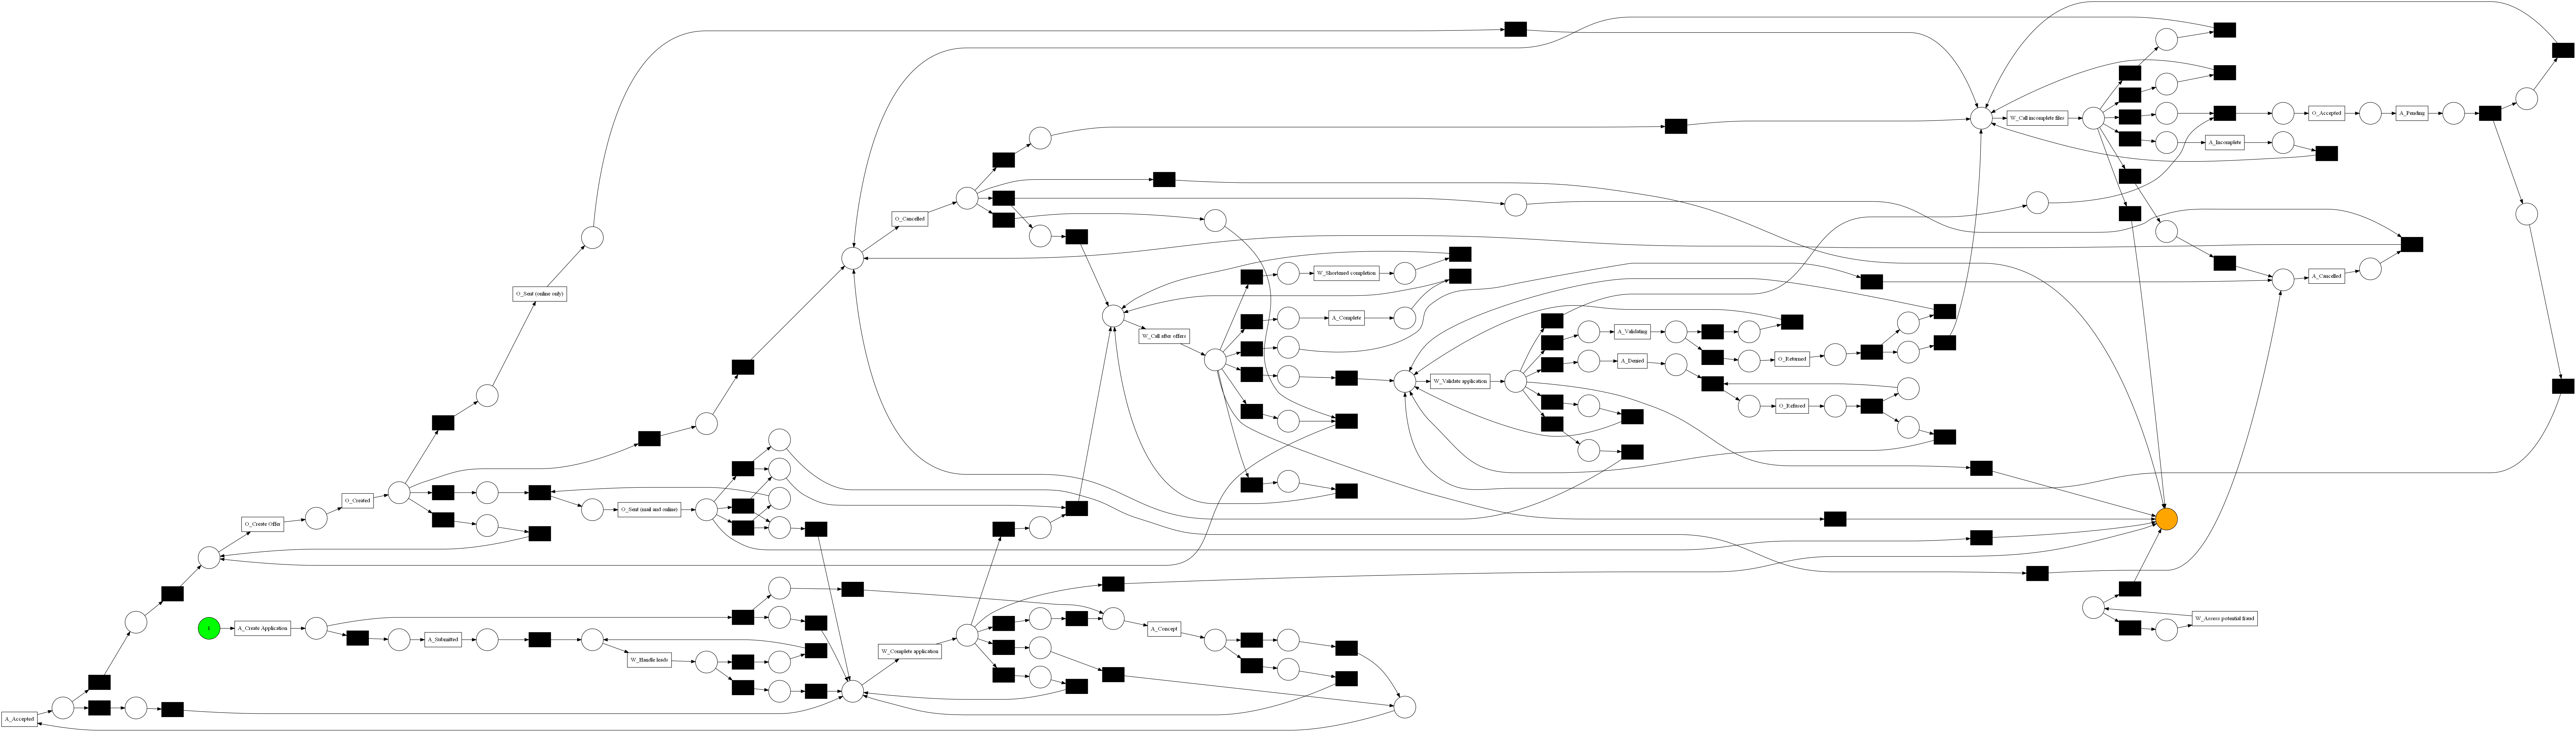

BPI2017_HM_099_xes HM-0.99 (unsound)  F: 0.9586684843  P: 0.6976174837  FS: 0.8075705629  G: 0.9520368532  S: 0.7123287671  DURATION: 0:04:06.802468


In [22]:
#input: log in XES format
print('BPI2017-xes Heuristic 099')
xes_log_path = path_base('BPI_2017_Random.xes') 
discover_process_models_hm_099(xes_log_path, 'BPI2017_HM_099_xes')

BPI2017-xes Heuristic 05
C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI_2017_Random.xes



C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI2017_HM_055_xes-HM-0.50 (unsound) .png


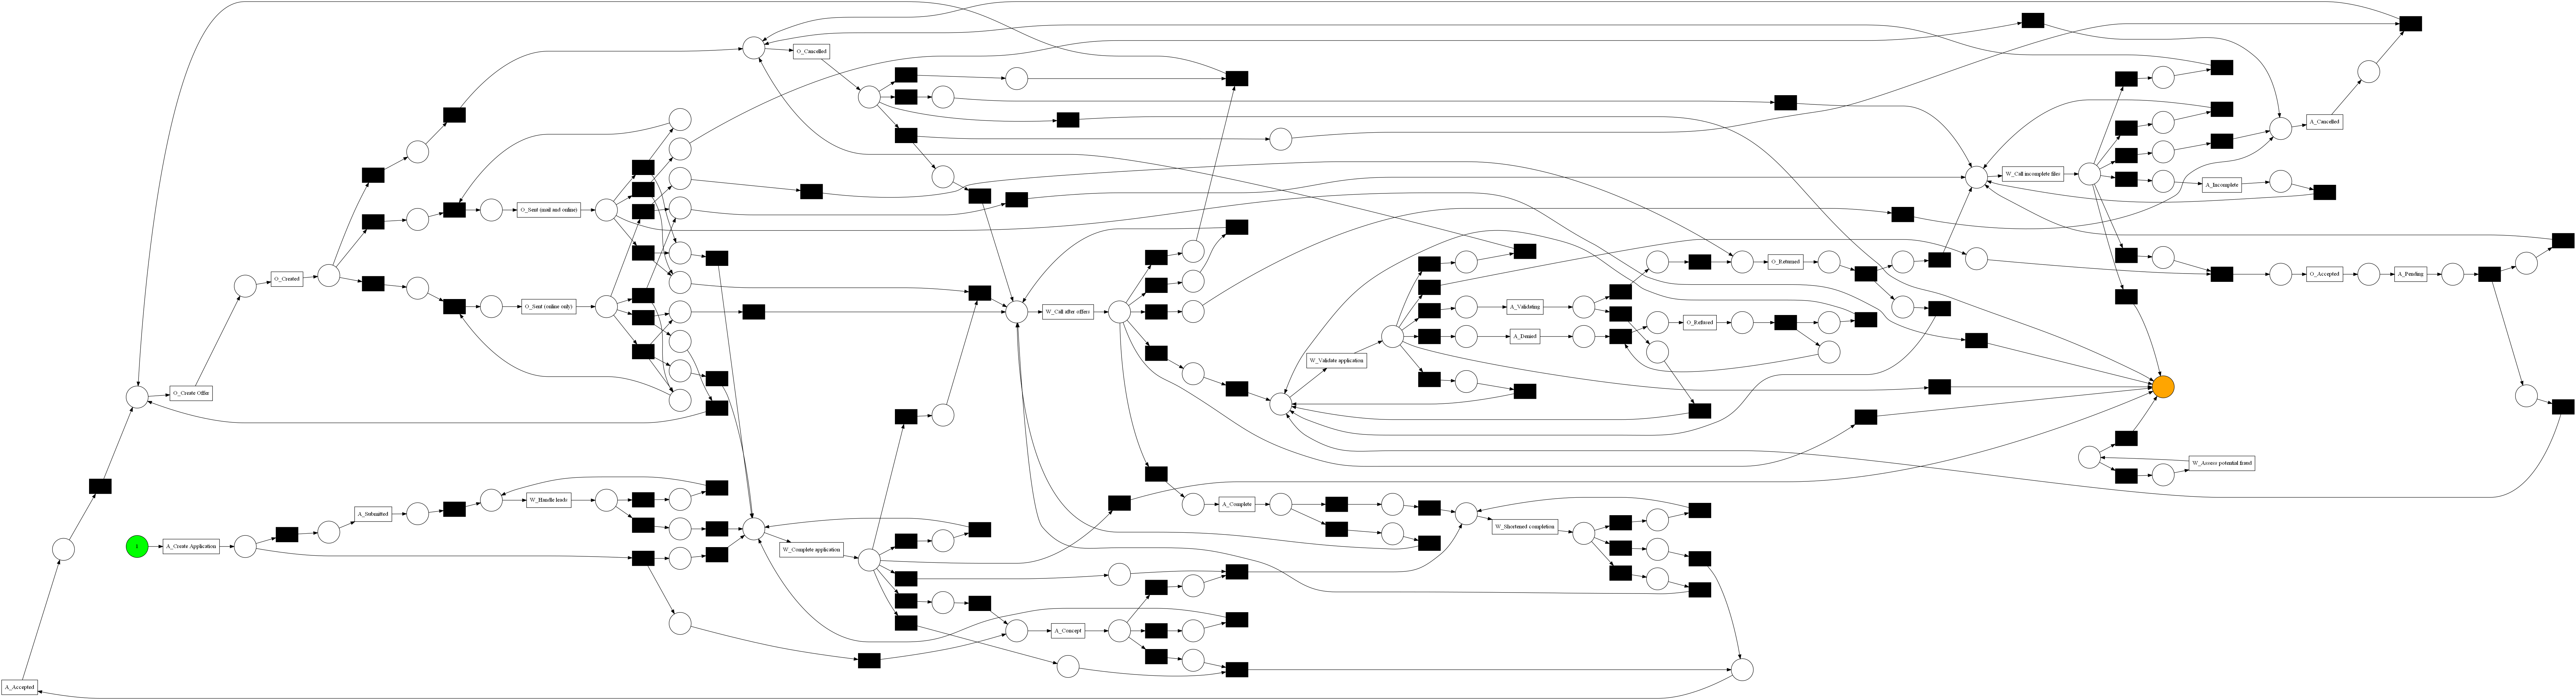

BPI2017_HM_055_xes HM-0.50 (unsound)  F: 0.9604967631  P: 0.7727850784  FS: 0.8564764814  G: 0.9179280238  S: 0.6923076923  DURATION: 0:03:26.670694


In [23]:
#input: log in XES format
print('BPI2017-xes Heuristic 05')
xes_log_path = path_base('BPI_2017_Random.xes') 
discover_process_models_hm_05(xes_log_path, 'BPI2017_HM_055_xes')

BPI2017-xes Heuristic 01
C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI_2017_Random.xes



C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI2017_HM_01_xes-HM-0.10 (unsound) .png


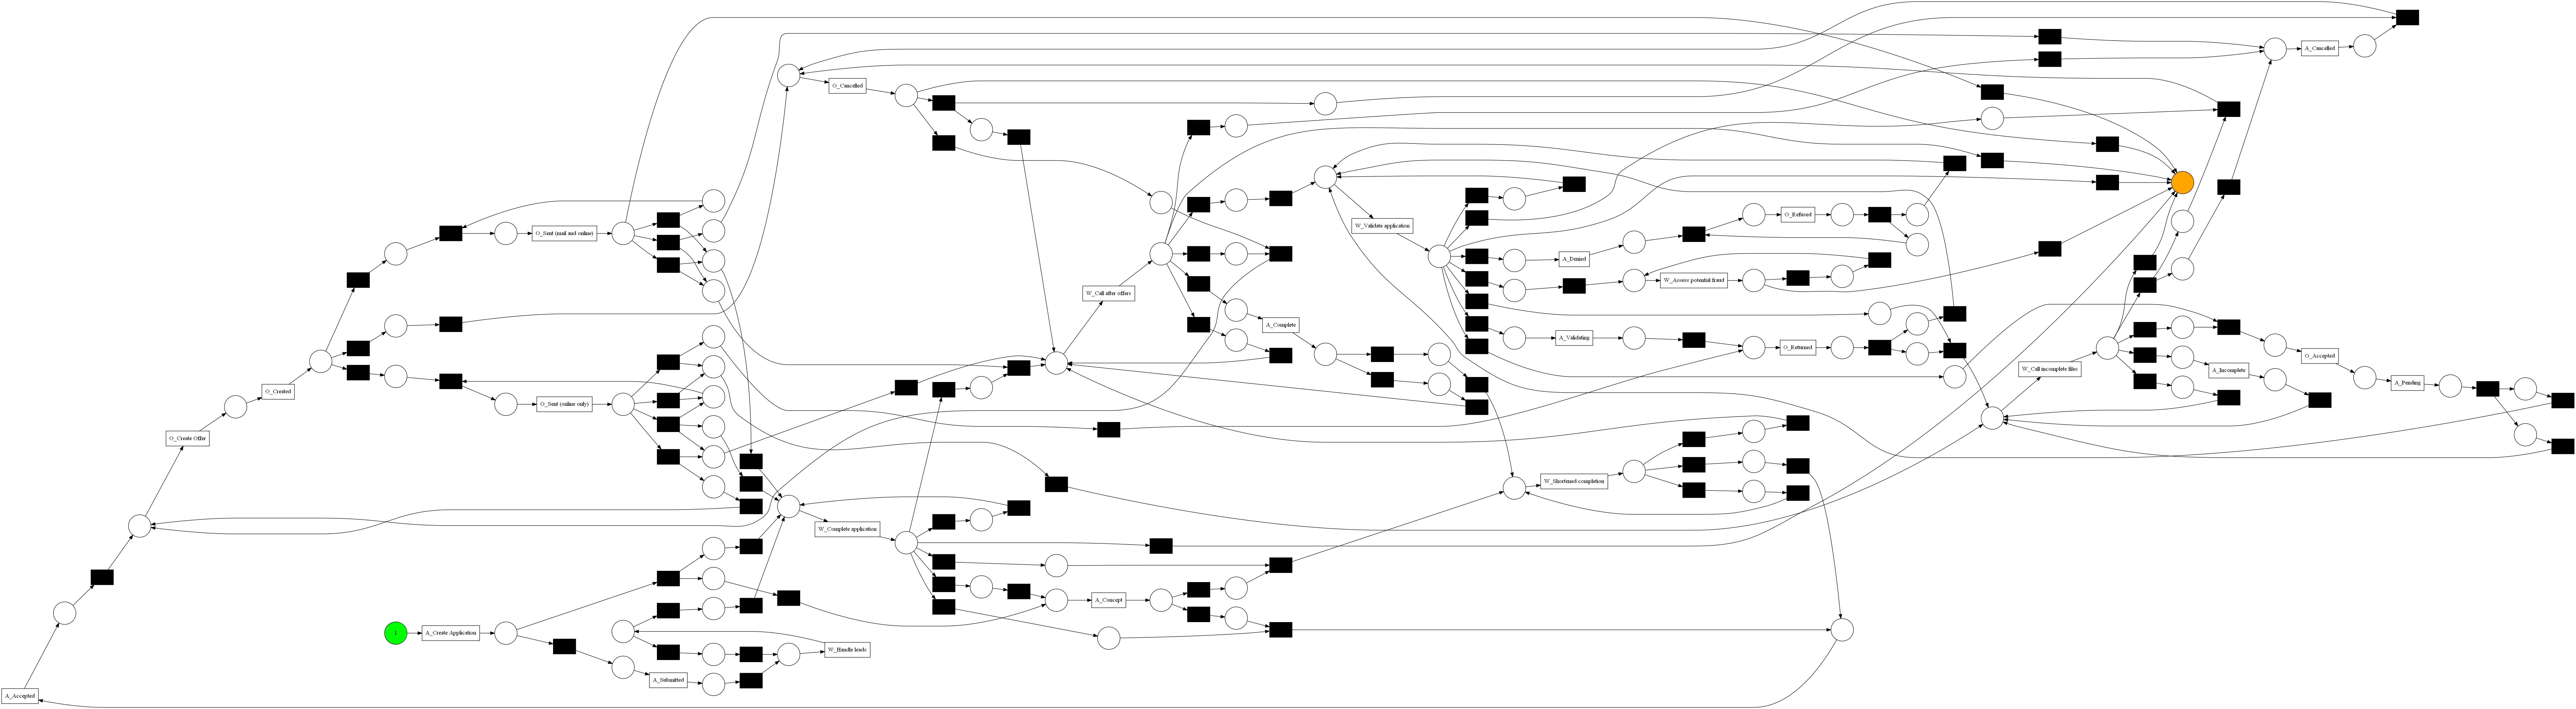

BPI2017_HM_01_xes HM-0.10 (unsound)  F: 0.9548747491  P: 0.7972661719  FS: 0.8689818573  G: 0.9174615350  S: 0.6909090909  DURATION: 0:02:53.022169


In [24]:
#input: log in XES format
print('BPI2017-xes Heuristic 01')
xes_log_path = path_base('BPI_2017_Random.xes')
discover_process_models_hm_01(xes_log_path, 'BPI2017_HM_01_xes')

# Executar Inductive

BPI2017-xes Inductive f02
C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI_2017_Random.xes



C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI2017_IMf02_xes-IMf-0.2_sound.png


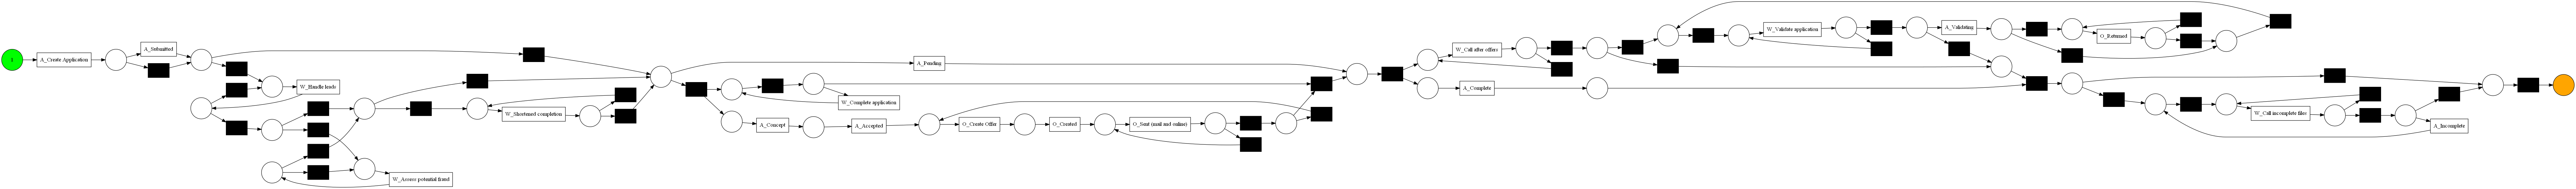

BPI2017_IMf02_xes IMf-0.2_sound F: 0.8628743898  P: 0.5121316301  FS: 0.6427684845  G: 0.9227133096  S: 0.7103448276  DURATION: 0:16:16.625310


In [28]:
#input: log in XES format
print('BPI2017-xes Inductive f02')
xes_log_path = path_base('BPI_2017_Random.xes')
discover_process_models_imf_02(xes_log_path, 'BPI2017_IMf02_xes')

BPI2017-xes Inductive f05
C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI_2017_Random.xes



C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI2017_IMf05_xes-IMf-0.5_sound.png


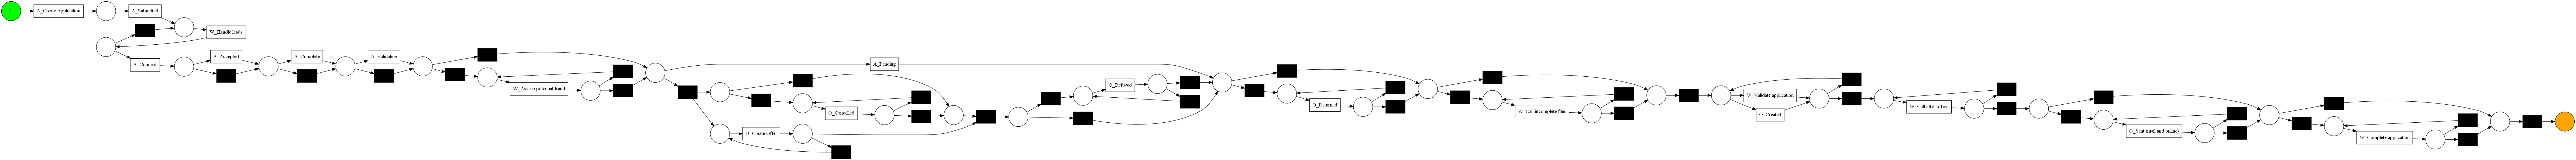

BPI2017_IMf05_xes IMf-0.5_sound F: 0.5108040859  P: 0.7354145161  FS: 0.6028681309  G: 0.8470953024  S: 0.6827586207  DURATION: 0:18:22.075299


In [29]:
#input: log in XES format
print('BPI2017-xes Inductive f05')
xes_log_path = path_base('BPI_2017_Random.xes')
discover_process_models_imf_05(xes_log_path, 'BPI2017_IMf05_xes')

BPI2017-xes Inductive f08
C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI_2017_Random.xes



C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI2017_IMf08_xes-IMf-0.8_sound.png


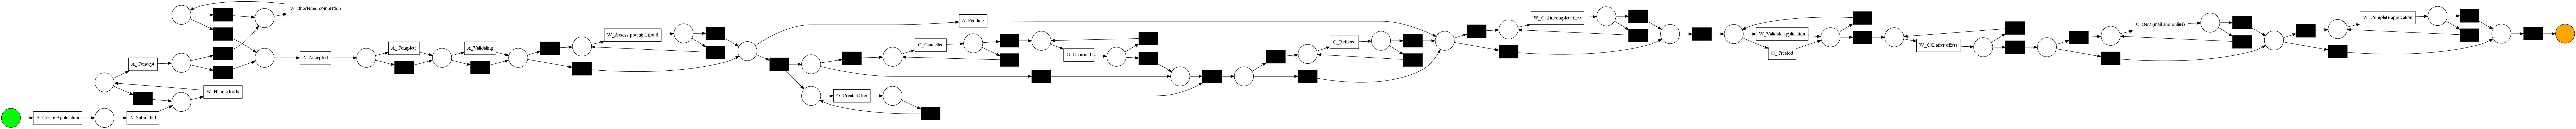

BPI2017_IMf08_xes IMf-0.8_sound F: 0.5549955815  P: 0.7354145161  FS: 0.6325923948  G: 0.8468882281  S: 0.6912751678  DURATION: 0:20:47.129827


In [30]:
#input: log in XES format
print('BPI2017-xes Inductive f08')
xes_log_path = path_base('BPI_2017_Random.xes')
discover_process_models_imf_08(xes_log_path, 'BPI2017_IMf08_xes')

BPI2017-xes Inductive d
C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI_2017_Random.xes



C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI2017_IMd_xes-IMd _sound.png


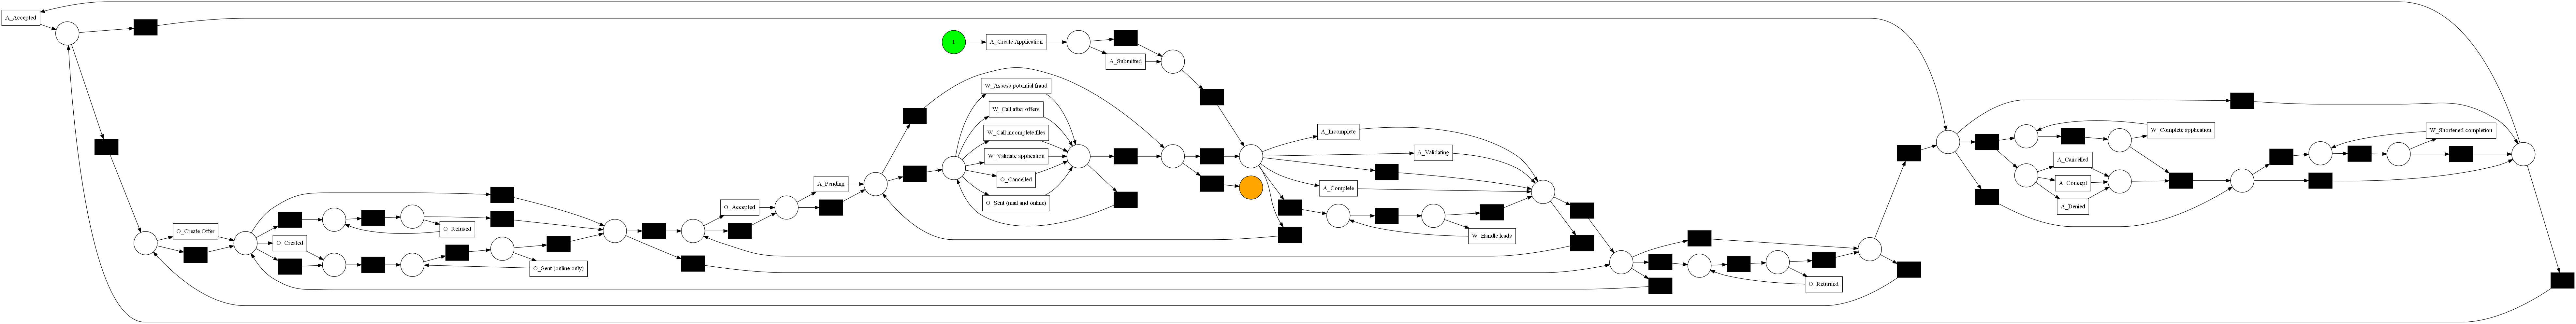

BPI2017_IMd_xes IMd _sound F: 0.9680996239  P: 0.1026301614  FS: 0.1855859845  G: 0.9267037585  S: 0.5869565217  DURATION: 0:16:43.931930


In [32]:
#input: log in XES format
print('BPI2017-xes Inductive d')
xes_log_path = path_base('BPI_2017_Random.xes')
discover_process_models_imd(xes_log_path, 'BPI2017_IMd_xes')

BPI2017-xes Inductive
C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI_2017_Random.xes



C:\MyGit\py_USP\notebook
C:\MyGit\py_USP\data
C:\MyGit\py_USP\data\BPI2017_IM_xes-IM_sound.png


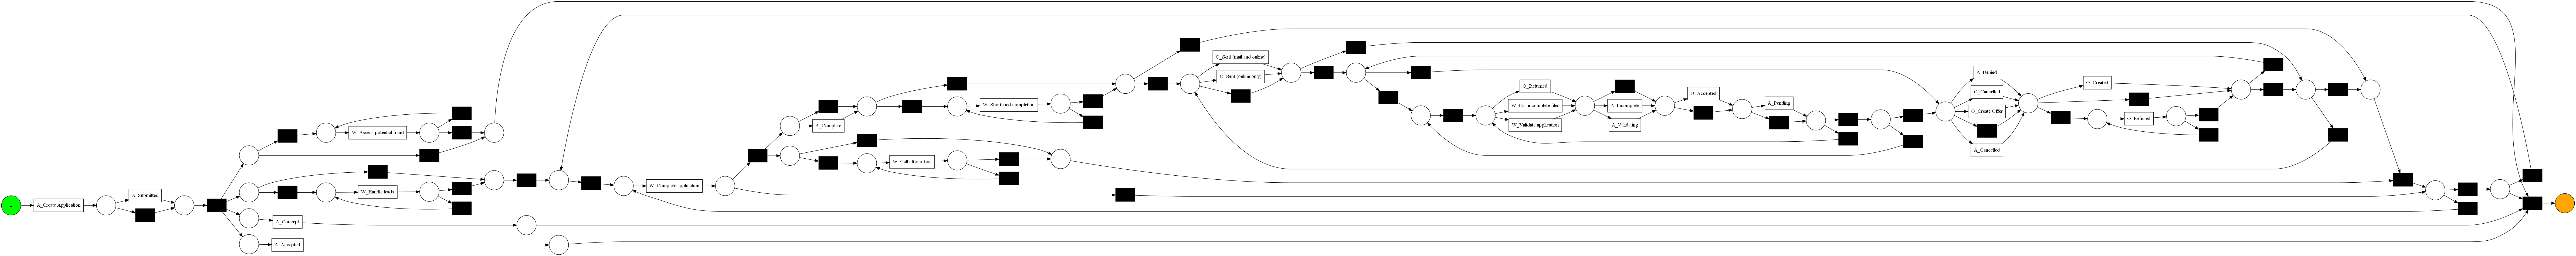

In [ ]:
#input: log in XES format
print('BPI2017-xes Inductive')
xes_log_path = path_base('BPI_2017_Random.xes')
discover_process_models_im(xes_log_path, 'BPI2017_IM_xes')